<a href="https://colab.research.google.com/github/drusho/100daysofcode/blob/main/Exploring_Car_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Ebay Car Sales Data

Data comes from a modified csv containing informaiton on used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

<br>

### __Project Goal:__
- Clean raw data and analyze the used car listings.
<br>

### __Results__

__Price__ 

Ebay prices showed a range of auction bids from 0-99 million.  There was gradual growth in pricing bids from 1 - 350k.  After 350k the prices jumped dramatically to just under a million dollars.  

<l>

||||
|:---|:----|:-:|
|Price| Description| % Total Sales|
| \$1.00 - \$350,000 | Most common car prices |97% |
|Over $1 Million| 14 total sales| 0.2%|
 
 </l>
 

<br>


In [352]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/drusho/100daysofcode/main/csv_files/Exploring_Ebay_Car_Sales_Data.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9392k  100 9392k    0     0  17.7M      0 --:--:-- --:--:-- --:--:-- 17.7M


In [353]:
# Read in the data
import pandas as pd
import numpy as np


df = pd.read_csv('Exploring_Ebay_Car_Sales_Data.csv', encoding='Latin-1')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


### __Description of Column Headings__
|Column  |Description |
|:-- |:-- |
|*dateCrawled* | When this ad was first crawled. All field-values are taken from this date. |
|*name*|Name of the car |
|*seller*|Whether the seller is private or a dealer.|
|*offerType*|The type of listing|
|*price*|The price on the ad to sell the car.|
|*abtest*|Whether the listing is included in an A/B test.
|*vehicleType*|The vehicle Type.|
|*yearOfRegistration*|The year in which the car was first registered.|
|*gearbox*|The transmission type.|
|*powerPS*|The power of the car in PS.|
|*model*|The car model name.|
|*kilometer*|How many kilometers the car has driven.|
|*monthOfRegistration*|The month in which the car was first registered.|
|*fuelType*|What type of fuel the car uses.|
|*brand*|The brand of the car.|
|*notRepairedDamage|If the car has a damage which is not yet repaired.|
|*dateCreated*|The date on which the eBay listing was created.|
|*nrOfPictures*|The number of pictures in the ad.|
|*postalCode*|The postal code for the location of the vehicle.|
|*lastSeenOnline*|When the crawler saw this ad last online.|

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

#### __Observation of Raw Data__
- The dataset contains 20 columns.  
- The majority of the data is stored as strings. 
- A few columns contain null values (ex. *vehicleType, gearbox, model*)
- None of the columns have more than ~20% null values (based off 49,999 entries compared to non-null counts)
- There are some columns that contain dates stored as strings.


### **Clean Columns**
- Camelcase to snakecase.
- Renaming some columns so that the headings reflect the data they contain

_examples:_
- _yearOfRegistration_ → _registration_year_
-  _odometer_ → _odometer_km_

In [355]:
# convert the column names from camelcase to snakecase

column_names = []
for column in df.columns:
  column_names.append(column.lower())
df.columns = column_names

df.columns

Index(['datecrawled', 'name', 'seller', 'offertype', 'price', 'abtest',
       'vehicletype', 'yearofregistration', 'gearbox', 'powerps', 'model',
       'odometer', 'monthofregistration', 'fueltype', 'brand',
       'notrepaireddamage', 'datecreated', 'nrofpictures', 'postalcode',
       'lastseen'],
      dtype='object')

In [356]:
# rename some column names to increase fluency

df.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']

df.columns


Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen'],
      dtype='object')

In [357]:
df.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-08 10:40:35,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


### __Drop Columns__
 
 The following columns have one or fewer unique values listed
- **num_photos** (0 for every row)
- _offer_type_
- _seller_

In [358]:
# drop columns with 1 or fewer values
 
df.drop(columns=['num_photos', 'offer_type', 'seller'], axis=1,inplace=True)
df.describe(include='all')

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
count,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.000000,50000
unique,48213,38754,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,39481
top,2016-03-08 10:40:35,Ford_Fiesta,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,2016-04-07 06:17:27
freq,3,78,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,71540.000000,NaN


In [359]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        50000 non-null  object
 1   name                50000 non-null  object
 2   price               50000 non-null  object
 3   ab_test             50000 non-null  object
 4   vehicle_type        44905 non-null  object
 5   registration_year   50000 non-null  int64 
 6   gearbox             47320 non-null  object
 7   power_ps            50000 non-null  int64 
 8   model               47242 non-null  object
 9   odometer            50000 non-null  object
 10  registration_month  50000 non-null  int64 
 11  fuel_type           45518 non-null  object
 12  brand               50000 non-null  object
 13  unrepaired_damage   40171 non-null  object
 14  ad_created          50000 non-null  object
 15  postal_code         50000 non-null  int64 
 16  last_seen           50

### __Convert str Columns to num Type__
Columns with numeric data stored as text that needs to be cleaned:
- _price_ ( $ , )
- _odometer_ ( km , )

In [360]:
df['odometer'].value_counts()

150,000km    32424
125,000km     5170
100,000km     2169
90,000km      1757
80,000km      1436
70,000km      1230
60,000km      1164
50,000km      1027
5,000km        967
40,000km       819
30,000km       789
20,000km       784
10,000km       264
Name: odometer, dtype: int64

In [361]:
df['price'].value_counts()

$0         1421
$500        781
$1,500      734
$2,500      643
$1,200      639
           ... 
$1,780        1
$1,247        1
$951          1
$13,888       1
$22,799       1
Name: price, Length: 2357, dtype: int64

In [362]:
# 'price' column has numeric values with chars stored as text.
# remove '$' , ',' and convert to int type
df['price'] = df['price'].str.replace('$','').str.replace(",","").astype(int)
df['price'].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int64

In [363]:
# 'odometer' column also has numeric values with chars  stored as text.
# remove 'km' , ',' and convert to int type
df['odometer'] = df['odometer'].str.replace("km","").str.replace(",","").astype(int)
df['odometer'].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer, dtype: int64

In [364]:
# rename odometer to reflect data in column (kilometers)
df.rename({"odometer": "odometer_km"}, axis=1, inplace=True)
df.info(column_names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        50000 non-null  object
 1   name                50000 non-null  object
 2   price               50000 non-null  int64 
 3   ab_test             50000 non-null  object
 4   vehicle_type        44905 non-null  object
 5   registration_year   50000 non-null  int64 
 6   gearbox             47320 non-null  object
 7   power_ps            50000 non-null  int64 
 8   model               47242 non-null  object
 9   odometer_km         50000 non-null  int64 
 10  registration_month  50000 non-null  int64 
 11  fuel_type           45518 non-null  object
 12  brand               50000 non-null  object
 13  unrepaired_damage   40171 non-null  object
 14  ad_created          50000 non-null  object
 15  postal_code         50000 non-null  int64 
 16  last_seen           50

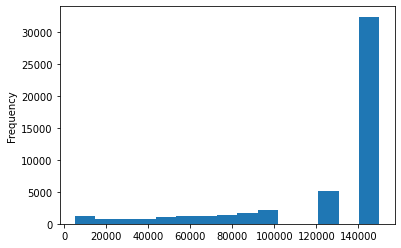

In [365]:
df["odometer_km"].plot.hist(bins=15, label="Histogram")

### **Analyze Odometer and Price**

In [366]:
print(f'Unique:\n {df["price"].unique().shape} \n')
print(f'Describe: \n{df["price"].describe()} \n')
print(f'Value Count (Top 5):')
df['price'].value_counts(ascending=False).head(5)

Unique:
 (2357,) 

Describe: 
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64 

Value Count (Top 5):


0       1421
500      781
1500     734
2500     643
1000     639
Name: price, dtype: int64

#### __Observation of _'Price'_ Column (1)__
**$0** accounts for 1421 cars or just 2.8 % of all cars in the _'prices'_ column.

Many of the number values for the 'price' column seem to be rounded, however given there are 2357 unique values in the column, this may just be a common trend for auction/bidding type websites (Ebay.com).

The maximum price is one hundred million dollars.

In [367]:
# further analysis of 'price' column to isolate outlyers 
print('Price by Index (Top 20):')
print(df['price'].value_counts().sort_index(ascending=False).head(20))
print('\nPrice by Index (Bottom 10):')
df['price'].value_counts().sort_index(ascending=True).head(10)

Price by Index (Top 20):
99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

Price by Index (Bottom 10):


0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
Name: price, dtype: int64

#### __Observation of _'Price'_ Column (2)__

| Price|% of Total|Description|
|:--|:--:| :--|
|\$1-\$350,000|  97%|Range of gradual price increases|
|$1| 0.3%|156 Cars|
|\$0|  2.8% |1421 Cars |
|Over \$999,990| 0.2%|14 Cars|



##### __Filter  _'Price'_ Data__
All 'price' data outside of the \$1.00 - \$350,000 dollar range will be excluded from further analysis.  This includes:

- 14 cars listed near or above 1 million.
- 1,421 cars listed at 0.00 dollars




In [368]:
# update df to show only prices between $1 - $351,000 
df = df[df['price'].between(1,351000)]

print(f"Price by Index (Top 5):\n{df['price'].value_counts().sort_index(ascending=False).head(5)} \n")


print(f"Price by Index (Bottom 5):")
df['price'].value_counts().sort_index(ascending=True).head(5)

Price by Index (Top 5):
350000    1
345000    1
299000    1
295000    1
265000    1
Name: price, dtype: int64 

Price by Index (Bottom 5):


1    156
2      3
3      1
5      2
8      1
Name: price, dtype: int64

#### __Observation of _'odomenter_km'_ Column__

In [369]:
print(f"Describe 'odometer_km':\n{df['odometer_km'].describe()} \n")
print(f"Odometer by Index (Top 5):\n{df['odometer_km'].value_counts().sort_index(ascending=False).head(5)}\n")
print(f"Odeometer by Index (Bottom 5):\n{df['odometer_km'].value_counts().sort_index(ascending=True).head(5)}\n")

Describe 'odometer_km':
count     48565.000000
mean     125770.101925
std       39788.636804
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64 

Odometer by Index (Top 5):
150000    31414
125000     5057
100000     2115
90000      1734
80000      1415
Name: odometer_km, dtype: int64

Odeometer by Index (Bottom 5):
5000     836
10000    253
20000    762
30000    780
40000    815
Name: odometer_km, dtype: int64



The _'odometer_km'_ column numbers are round numbers. This data was likely recorded using predetermined options such as from a dropdown menu on the website.


**150,000 km** is the max odometer reading and is also very common, accounting for **over 30,000 cars** *or* **65% of all cars**.  Overall there are more high mileage cars than low mileage ones.

### __Exploring the Date Columns__
Columns with dates as values 
_(some of the data is in string format)_
    
- date_crawled
- registration_month
- registration_year
- ad_created
- last_seen

Dates in the columns listed above are currently displayed in a  variety of formats (ex. str) that need to be converted to workable date types before exploration can continue.


In [370]:
df[['date_crawled', 'ad_created', 'last_seen']][0:5].info()
df[['date_crawled', 'ad_created', 'last_seen']][0:5]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date_crawled  5 non-null      object
 1   ad_created    5 non-null      object
 2   last_seen     5 non-null      object
dtypes: object(3)
memory usage: 160.0+ bytes


,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


Date columns that are in string format: 
- date_crawled
- ad_created
- last_seen

In [371]:
# convert strings to date types 

df['date_crawled'] = pd.to_datetime(df['date_crawled']).dt.normalize()
df['last_seen'] = pd.to_datetime(df['last_seen']).dt.normalize()
df['ad_created'] = pd.to_datetime(df['ad_created']).dt.normalize()

print(df[['date_crawled', 'ad_created', 'last_seen']].dtypes)

df[['date_crawled', 'ad_created', 'last_seen']][0:5]

date_crawled    datetime64[ns]
ad_created      datetime64[ns]
last_seen       datetime64[ns]
dtype: object


,date_crawled,ad_created,last_seen
0,2016-03-26,2016-03-26,2016-04-06
1,2016-04-04,2016-04-04,2016-04-06
2,2016-03-26,2016-03-26,2016-04-06
3,2016-03-12,2016-03-12,2016-03-15
4,2016-04-01,2016-04-01,2016-04-01


In [372]:
#ordering df by 'date_crawled'using between
df[df['date_crawled'].between("2014-02","2016-03-30")].sort_values(by='date_crawled',ascending=True).head(5)


,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
42065,2016-03-05,Volkswagen_Passat_1.8,799,test,limousine,1996,manuell,75,passat,150000,6,benzin,volkswagen,ja,2016-03-03,55494,2016-03-06
31862,2016-03-05,"Smart_Schaltwippen_Tempomat_Spikeline_16""",5399,test,cabrio,2003,automatik,82,roadster,80000,9,benzin,smart,nein,2016-03-03,60322,2016-04-01
22750,2016-03-05,"Audi_A4___2.5TDi__Xenon__18""_AEZ__Klima_und_mehr",3999,control,limousine,2001,manuell,160,a4,150000,8,diesel,audi,nein,2016-03-05,37632,2016-03-08
22743,2016-03-05,Ford_Kuga_2.0_TDCi_2x4_Titanium,11690,control,suv,2008,manuell,136,kuga,125000,10,diesel,ford,nein,2016-03-05,53909,2016-04-05
3085,2016-03-05,Volvo_142,8990,control,limousine,1970,manuell,82,andere,150000,3,benzin,volvo,nein,2016-03-05,81925,2016-04-05


In [373]:
print(f"Registration_Year (top 5):\n{df['registration_year'].sort_index(ascending=False).head(5)}\n")
df['registration_year'].describe()

Registration_Year (top 5):
49999    1996
49998    2013
49997    2014
49996    1996
49995    2011
Name: registration_year, dtype: int64



count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

#### Analysis: Registration_Year 
The car registration years are inaccurate.  Max year is 9999 and min is 1000

A car can't registered on Ebay before the listing has been seen.  Looking at other date scraping columns ('date_crawled', 'ad_created', 'last_seen') the latest registration year will be no more than 2016. Determining the earliest valid year will be more difficult. It can be asumed that cars before 1900s should be removed of the dataset.


In [377]:
# Number of Dates that fall within reasonable timeline (1995 to present)
print(f"Count for Registration_Year (1995-2020):\n{df['registration_year'].between(1900,2016).sum()}\n")

# Update registration year to reflect 1995-present timeline
df = df[df['registration_year'].between(1995,2016)]

df['registration_year'].describe()

Count for Registration_Year (1995-2020):
43274



count    43274.000000
mean      2004.139252
std          5.316405
min       1995.000000
25%       2000.000000
50%       2004.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

In [378]:
print(f"Registration_Year (Top 5):\n{df['registration_year'].sort_index(ascending=False).head(5)}\n")
print(f"Registration_Year (Bottom 5):\n{df['registration_year'].sort_index(ascending=True).head(5)}")

Registration_Year (Top 5):
49999    1996
49998    2013
49997    2014
49996    1996
49995    2011
Name: registration_year, dtype: int64

Registration_Year (Bottom 5):
0    2004
1    1997
2    2009
3    2007
4    2003
Name: registration_year, dtype: int64


### Analysis: Registration_Year (2)

With registration_year dates fixed the timeline now displays data from the years 1995-2016.  The most popular registration year is 1996, followed closily by 2013 and 2014.  Overall it appears that most of the vehicles were registered in the past 20 years